In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import io
import base64

/var/folders/fb/xl0hnskx527bfqkv38l3sn7h0000gn/T/ipykernel_7327/3519854905.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
with open("_data/202402_CEN08B3_data.txt", encoding = "utf-16") as f:
    line = f.readline()
    row = 0
    data = []
    row_indexes = []
    while line != "":
        if row == 0:
            # prvni zaznam je 'Oddíl ECOICOP', coz je nas index
            columns = line.replace("\n", "").replace('"', "").split("\t")[1:]
        else:
            processed_line = line.replace("\n", "").replace(",", ".").split("\t")
            row_indexes.append(processed_line[0])
            data.append(processed_line[1:])
        line = f.readline()
        row += 1

print(columns)
print(data)

['Úhrn', 'Potraviny a nealkoholické nápoje', 'Alkoholické nápoje, tabák', 'Odívání a obuv', 'Bydlení, voda, energie, paliva', 'Bytové vybavení, zařízení domácnosti; opravy', 'Zdraví', 'Doprava', 'Pošty a telekomunikace', 'Rekreace a kultura', 'Vzdělávání', 'Stravování a ubytování', 'Ostatní zboží a služby']
[['102.2', '104.5', '103.2', '99.5', '102.3', '100.6', '104.0', '101.0', '98.8', '100.4', '101.5', '103.8', '100.8'], ['101.8', '102.3', '102.3', '99.9', '102.3', '101.3', '103.8', '101.1', '97.7', '100.4', '101.5', '103.4', '101.4'], ['101.7', '101.9', '102.0', '99.8', '102.3', '101.0', '103.8', '101.1', '97.6', '100.7', '101.5', '103.4', '102.1'], ['101.9', '101.8', '103.8', '99.2', '102.5', '101.1', '103.8', '101.5', '97.8', '100.8', '101.5', '103.5', '101.9'], ['102.2', '102.4', '103.6', '98.6', '102.5', '101.5', '103.9', '102.9', '97.8', '100.5', '101.5', '103.6', '102.5'], ['102.6', '102.7', '103.5', '99.1', '102.8', '101.3', '103.7', '104.6', '98.2', '100.5', '101.6', '103.6'

In [3]:
for i in range(len(data)):
    assert len(columns) == len(data[i]), "Pozor, nesedi pocet sloupcu"

In [4]:
df = pd.DataFrame(data, index = row_indexes)
df.columns = columns

In [5]:
df

,Úhrn,Potraviny a nealkoholické nápoje,"Alkoholické nápoje, tabák",Odívání a obuv,"Bydlení, voda, energie, paliva","Bytové vybavení, zařízení domácnosti; opravy",Zdraví,Doprava,Pošty a telekomunikace,Rekreace a kultura,Vzdělávání,Stravování a ubytování,Ostatní zboží a služby
01/2018,102.2,104.5,103.2,99.5,102.3,100.6,104.0,101.0,98.8,100.4,101.5,103.8,100.8
02/2018,101.8,102.3,102.3,99.9,102.3,101.3,103.8,101.1,97.7,100.4,101.5,103.4,101.4
03/2018,101.7,101.9,102.0,99.8,102.3,101.0,103.8,101.1,97.6,100.7,101.5,103.4,102.1
04/2018,101.9,101.8,103.8,99.2,102.5,101.1,103.8,101.5,97.8,100.8,101.5,103.5,101.9
05/2018,102.2,102.4,103.6,98.6,102.5,101.5,103.9,102.9,97.8,100.5,101.5,103.6,102.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/2023,108.5,103.7,106.1,107.9,119.6,103.3,109.2,97.8,103.3,107.7,106.5,109.2,105.4
11/2023,107.3,101.5,105.9,107.4,117.0,102.6,106.2,97.7,103.2,106.9,106.4,108.8,106.0
12/2023,106.9,99.7,105.7,106.1,116.8,102.3,106.6,99.8,103.6,106.0,106.4,108.5,104.9
01/2024,102.3,96.1,105.8,105.9,103.1,101.4,105.4,100.4,103.4,104.8,106.8,108.9,103.5


- Na toto se chceme dostat, hodnoty jsou ve formátu 2.0 %:

![Rada](./_img/FusionCharts.png)

In [7]:
df['Úhrn']

01/2018    102.2
02/2018    101.8
03/2018    101.7
04/2018    101.9
05/2018    102.2
           ...  
10/2023    108.5
11/2023    107.3
12/2023    106.9
01/2024    102.3
02/2024    102.0
Name: Úhrn, Length: 74, dtype: object

# Toto je ${\color{red}chyba}$, protože hodnoty jsou object, takže osa y je ${\color{red}mišmaš}$.

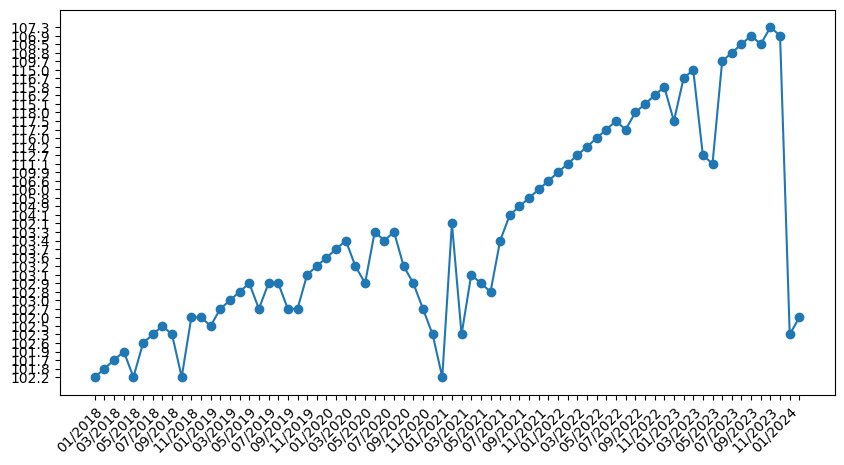

In [8]:
display.display(display.Markdown("""# Toto je ${\color{red}chyba}$, protože hodnoty jsou object, takže osa y je ${\color{red}mišmaš}$."""))
fig = plt.figure(figsize = (10,5))
plt.plot(df['Úhrn'], marker = 'o')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.show()

In [9]:
# toto nejde ani udělat
fig = plt.figure(figsize = (10,5))
plt.plot(df['Úhrn']-100, marker = 'o')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

<Figure size 1000x500 with 0 Axes>

In [10]:
df['Úhrn'].index

Index(['01/2018', '02/2018', '03/2018', '04/2018', '05/2018', '06/2018',
       '07/2018', '08/2018', '09/2018', '10/2018', '11/2018', '12/2018',
       '01/2019', '02/2019', '03/2019', '04/2019', '05/2019', '06/2019',
       '07/2019', '08/2019', '09/2019', '10/2019', '11/2019', '12/2019',
       '01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020',
       '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020',
       '01/2021', '02/2021', '03/2021', '04/2021', '05/2021', '06/2021',
       '07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021',
       '01/2022', '02/2022', '03/2022', '04/2022', '05/2022', '06/2022',
       '07/2022', '08/2022', '09/2022', '10/2022', '11/2022', '12/2022',
       '01/2023', '02/2023', '03/2023', '04/2023', '05/2023', '06/2023',
       '07/2023', '08/2023', '09/2023', '10/2023', '11/2023', '12/2023',
       '01/2024', '02/2024'],
      dtype='object')

In [11]:
df['Úhrn'].values

array(['102.2', '101.8', '101.7', '101.9', '102.2', '102.6', '102.3',
       '102.5', '102.3', '102.2', '102.0', '102.0', '102.5', '102.7',
       '103.0', '102.8', '102.9', '102.7', '102.9', '102.9', '102.7',
       '102.7', '103.1', '103.2', '103.6', '103.7', '103.4', '103.2',
       '102.9', '103.3', '103.4', '103.3', '103.2', '102.9', '102.7',
       '102.3', '102.2', '102.1', '102.3', '103.1', '102.9', '102.8',
       '103.4', '104.1', '104.9', '105.8', '106.0', '106.6', '109.9',
       '111.1', '112.7', '114.2', '116.0', '117.2', '117.5', '117.2',
       '118.0', '115.1', '116.2', '115.8', '117.5', '116.7', '115.0',
       '112.7', '111.1', '109.7', '108.8', '108.5', '106.9', '108.5',
       '107.3', '106.9', '102.3', '102.0'], dtype=object)

In [12]:
df['Úhrn'].astype(float)-100

01/2018    2.2
02/2018    1.8
03/2018    1.7
04/2018    1.9
05/2018    2.2
          ... 
10/2023    8.5
11/2023    7.3
12/2023    6.9
01/2024    2.3
02/2024    2.0
Name: Úhrn, Length: 74, dtype: float64

# Toto je ${\color{green}OK}$, protože hodnoty se převedou pomocí astype, takže osa y je ${\color{green}float}$.

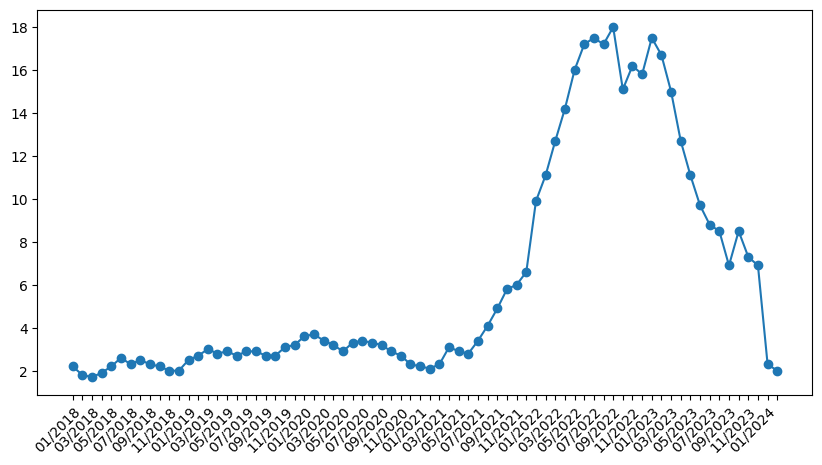

In [13]:
display.display(display.Markdown("""# Toto je ${\color{green}OK}$, protože hodnoty se převedou pomocí astype, takže osa y je ${\color{green}float}$."""))
fig = plt.figure(figsize = (10,5))
plt.plot(df['Úhrn'].astype(float)-100, marker = 'o')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.show()

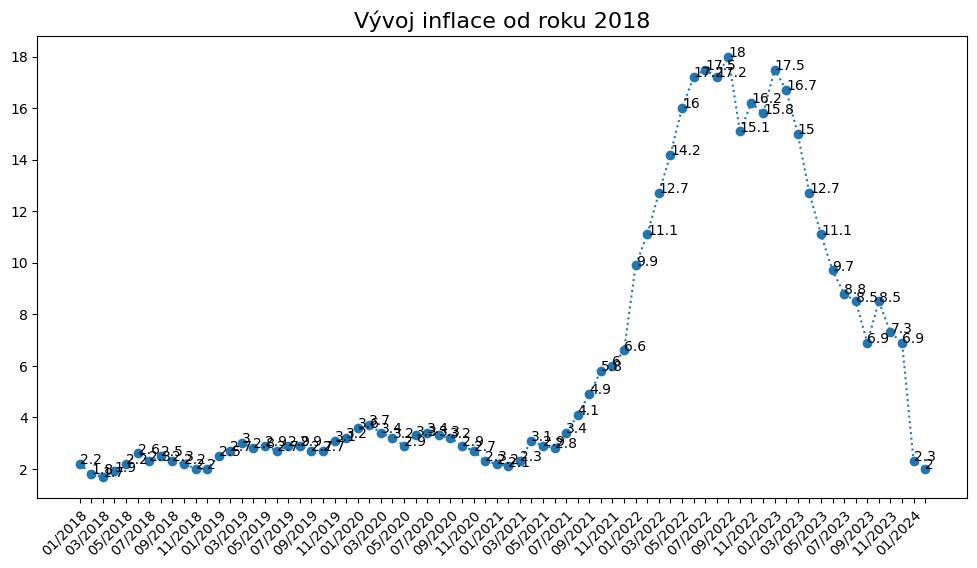

In [14]:
def add_labels(line):
    x,y=line.get_data()
    #labels=map(':'.join,zip(map(lambda s: '%g'%s,x),map(lambda s: '%g'%s,y)))
    labels=map(''.join,map(lambda s: '%g'%s,y))
    list(map(plt.text,x,y,labels))

fig = plt.figure(figsize = (12,6))
line, = plt.plot(df['Úhrn'].astype(float)-100, marker = 'o', linestyle = ':')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.title("Vývoj inflace od roku 2018", fontsize=16)
add_labels(line)
plt.show()

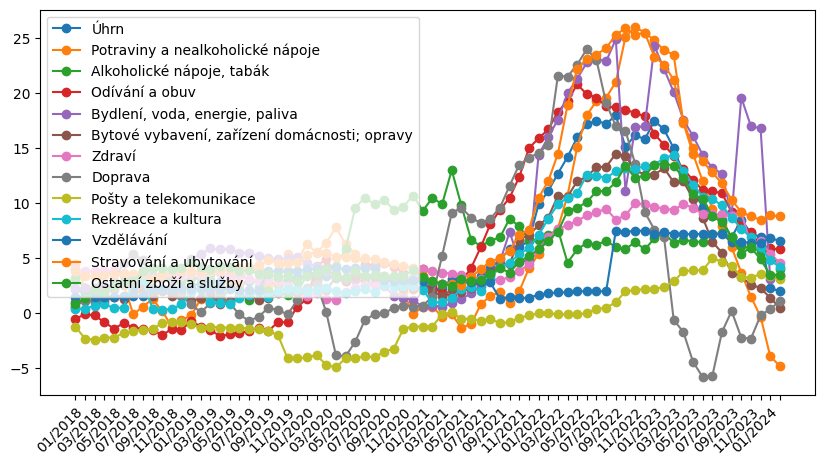

In [15]:
fig = plt.figure(figsize = (10,5))
plt.plot(df.astype(float)-100, marker = 'o')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.legend(df.columns)
plt.show()

In [16]:
df[['Úhrn','Zdraví']]

,Úhrn,Zdraví
01/2018,102.2,104.0
02/2018,101.8,103.8
03/2018,101.7,103.8
04/2018,101.9,103.8
05/2018,102.2,103.9
...,...,...
10/2023,108.5,109.2
11/2023,107.3,106.2
12/2023,106.9,106.6
01/2024,102.3,105.4


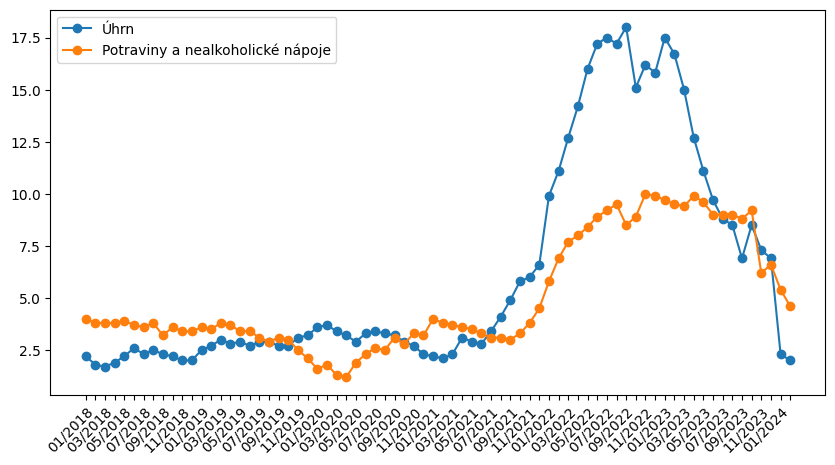

In [17]:
fig = plt.figure(figsize = (10,5))
plt.plot(df[['Úhrn','Zdraví']].astype(float)-100, marker = 'o')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.legend(df.columns)
plt.show()

# Udělám z grafů obrázky s dvojicí řad 'Úhrn' a další řada

In [18]:
# toto nic nezobrazí
fig = plt.figure(figsize = (10,5))
plt.plot(df[['Úhrn','Zdraví']].astype(float)-100, marker = 'o')
plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
#plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
plt.legend(df.columns)
data = io.BytesIO()
plt.savefig(data, bbox_inches='tight')
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
plt.close(fig)

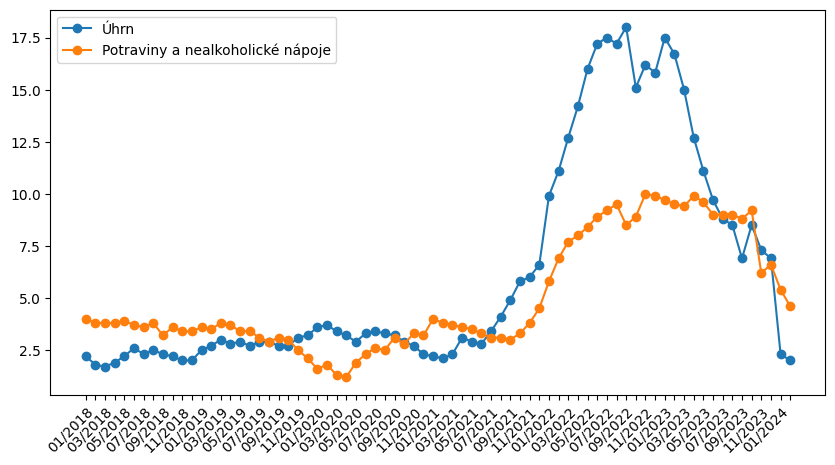

In [19]:
# až toto
display.display(display.Markdown(F"""![{alt}]({image})"""))

In [20]:
# toto nic nezobrazí
def create_graph_data (df, column):
    fig = plt.figure(figsize = (10,5))
    plt.plot(df[['Úhrn',column]].astype(float)-100, marker = 'o')
    plt.xticks(range(len(df)), [x if not i%2 else "" for i, x in enumerate(df.index)], rotation = 45, ha = 'right', rotation_mode = 'anchor')
    #plt.xticks(range(len(x)), labels = [f'{x:0>10,.2f}'.replace(',', ' ').replace('.', ',') for x in x.round(1)*10000], rotation = 45, ha = 'right', rotation_mode="anchor")
    plt.legend(['Úhrn',column])
    data = io.BytesIO()
    plt.savefig(data, bbox_inches='tight')
    image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
    alt = "Sample Visualization"
    plt.close(fig)
    return alt, image

In [21]:
for column in df.columns:
    print(column)

Úhrn
Potraviny a nealkoholické nápoje
Alkoholické nápoje, tabák
Odívání a obuv
Bydlení, voda, energie, paliva
Bytové vybavení, zařízení domácnosti; opravy
Zdraví
Doprava
Pošty a telekomunikace
Rekreace a kultura
Vzdělávání
Stravování a ubytování
Ostatní zboží a služby


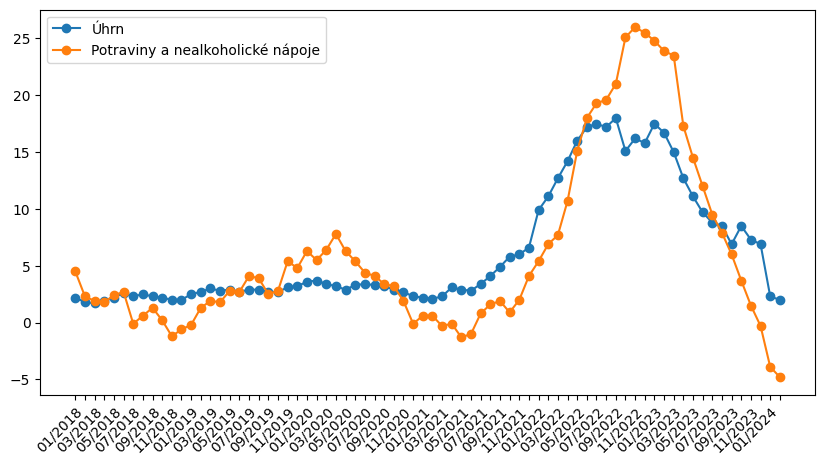

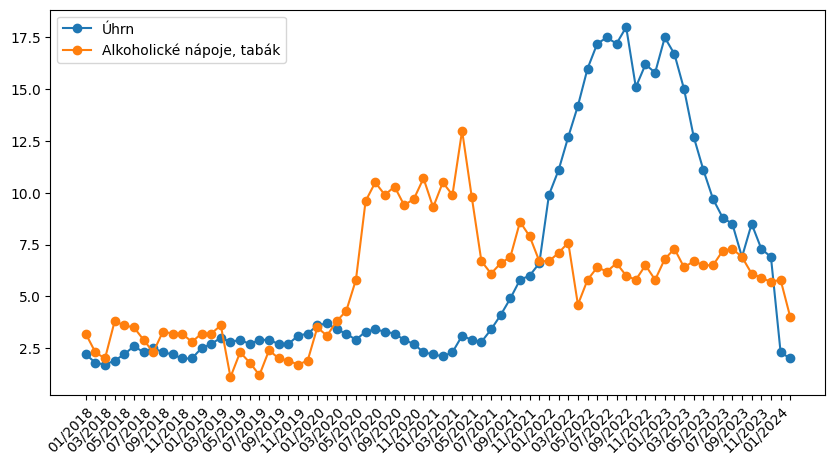

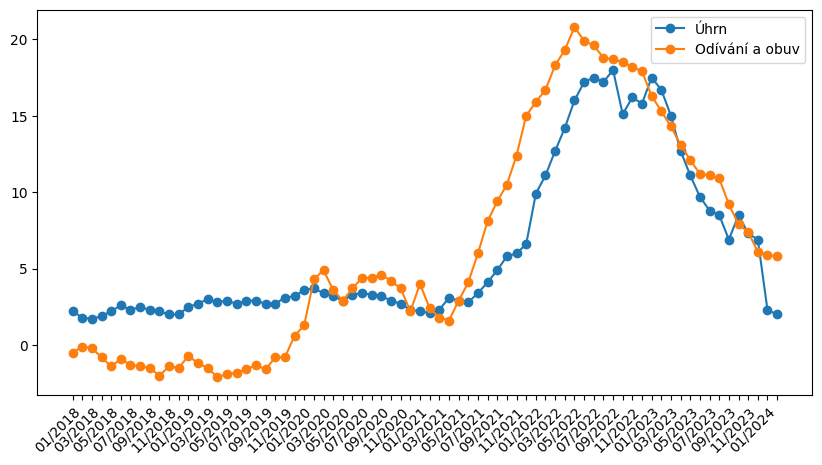

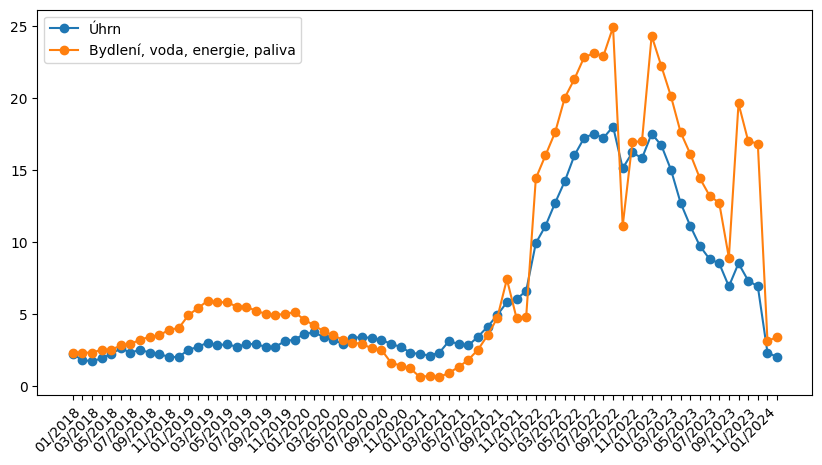

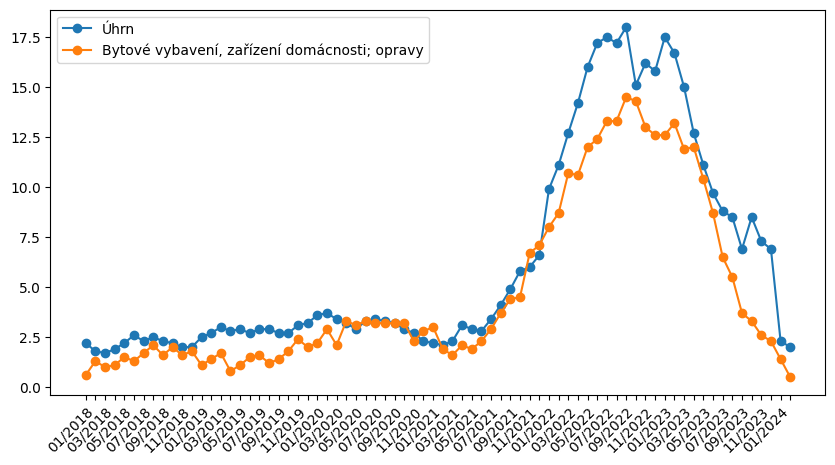

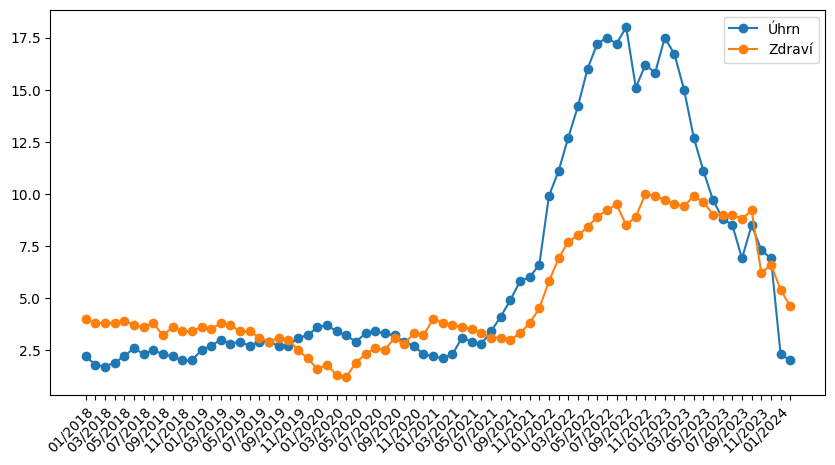

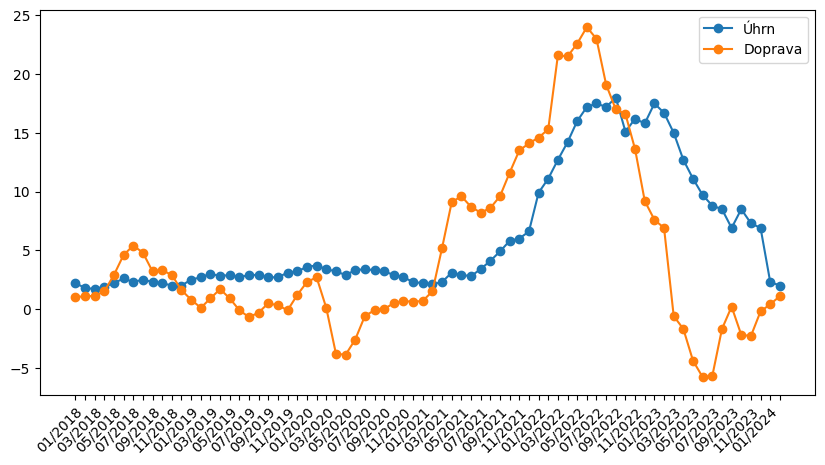

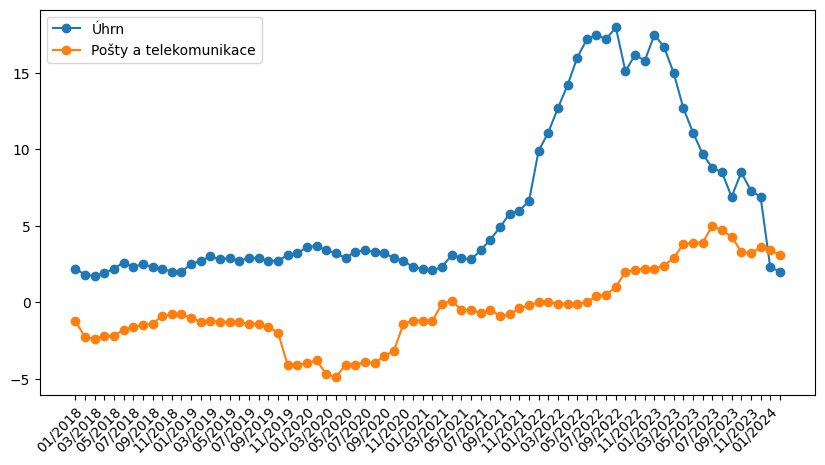

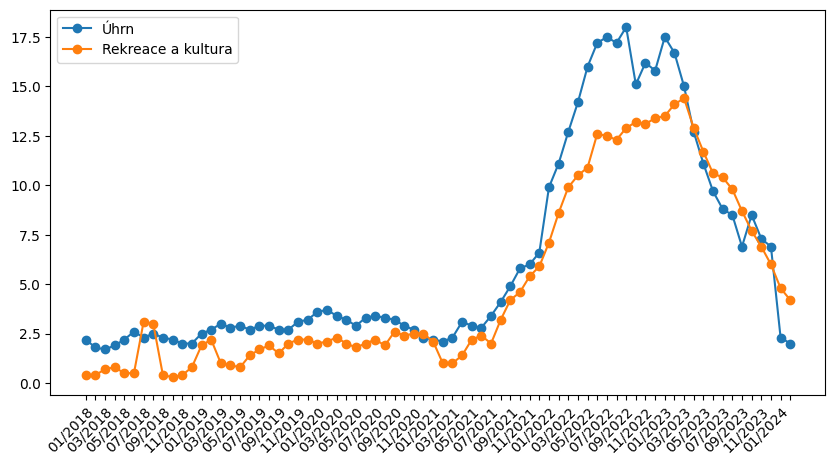

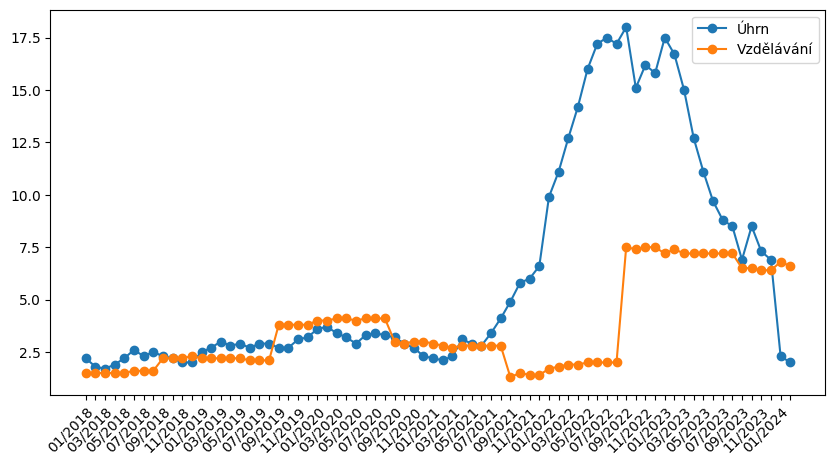

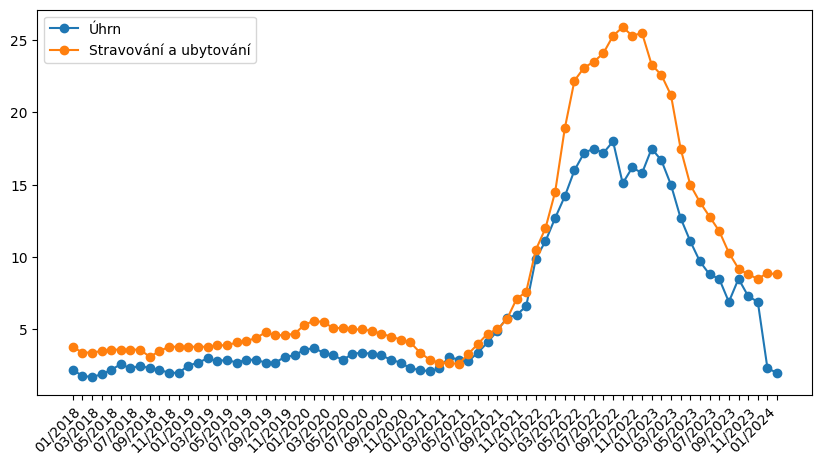

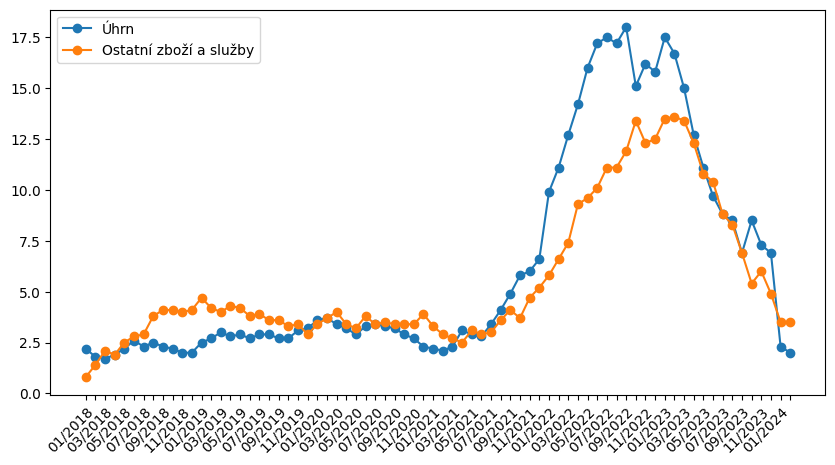

In [22]:
for column in df.columns:
    #print(column)
    if column != 'Úhrn':
        alt, image = create_graph_data(df, column)
        # až toto
        display.display(display.Markdown(F"""![{alt}]({image})"""))